<a href="https://colab.research.google.com/github/Lajs5257/DevF-MachineLearning/blob/main/KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Clustering

"If intelligence was a cake, unsupervised learning would be the cake, supervised learning would be the icing on the cake, and reinforcement learning would be the cherry on the cake" - Yann LeCun

Análisis de Agrupamientos: Proceso de particionamiento de un conjunto de datos (u observaciones) en subconjuntos. Cada subconjunto es un grupo o cluster.

* Los datos en un mismo cluster deben ser similares entre sí.
* Los datos de diferentes clusters deben ser diferentes entre sí.

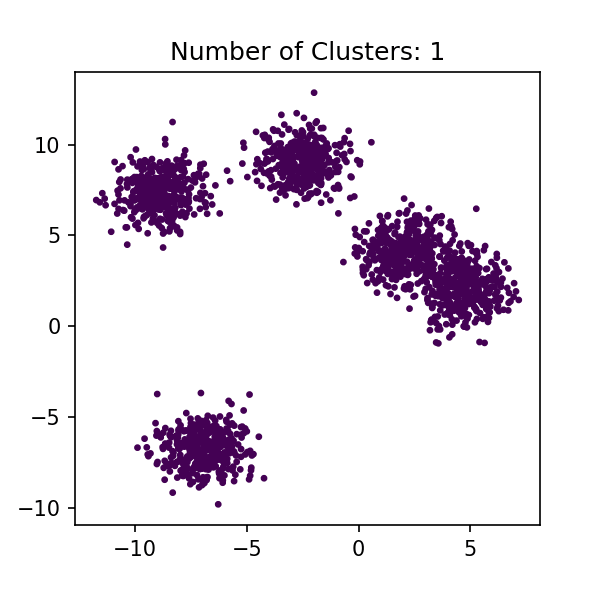

## K-Means

* Método que permite crear __clusters__ a partir de __datos numéricos__. El input del sistema son las mediciones numéricas de interés y los outputs son:
    * los centroides de los __clusters__ resultantes
    * la asignación de cada dato a un __cluster__ determinado.

* El __centroide__ es el punto que se encuentra en el centro de un __cluster__, (es la media de las coordenadas de todos los puntos de ese __cluster__). 

* El número de centroides `k` es definido según convenga, para definir la distancia entre puntos y entre centroides se suele utilizar la distancia euclídea.

* La __inercia__ del modelo es la métrica de rendimiento usada para saber donde colocar mejor los centroides, la inercia del modelo es la
distancia media cuadrática entre cada observación y su centroide más cercano.

La Inercia o __Within sum of squares__ se obtiene:

$WSS = \sum_{i = 1}^{K}\sum_{j = 1}^{n_i}{\mid x_{ij} - c_i\mid}^2$

donde:

- $K$, es el número de centroides
- $n_i$, es el número de elementos que pertenecen al centroide $i$
- $c_i$, centroide del cluster $i$
- $x_{ij}$, elemento $j$ del cluster $i$

### Implementación en Scikit-learn

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import datasets

In [ ]:
# importamos iris
iris_dat = datasets.load_iris()

iris = (pd.DataFrame(iris_dat.data)
       .rename(columns = {0:'sepal_length', 1:'sepal_width', 2:'petal_length', 3:'petal_width'})
       .assign(species = lambda x: pd.Series(iris_dat.target)#.replace({0:'virginica', 1:'setosa', 2:'versicolor'})
              )
       )

In [ ]:
iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


#### Inspección visual (ternary plot)

In [ ]:
import plotly.express as px
df = px.data.election()
fig = px.scatter_ternary(iris, 
                         a="sepal_length", 
                         b="petal_length", 
                         c="sepal_width",
                         size='petal_width',
                         size_max = 12,
                         color  = 'petal_width'
                         )
fig.show()

#### Inspección visual (scatter plot)

In [ ]:
fig = px.scatter(iris,
                 x="sepal_length",
                 y="petal_length",
                 size="sepal_width",
                 color="petal_width")
fig.show()

### Seleccionamos el numero de clusters

In [ ]:
X = iris.drop(columns = ['species'])
y = iris['species']

In [ ]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.30, 
                                                    random_state=42, 
                                                    stratify=y)

#### `n_clusters`

De forma arbitraria seleccionamos el valor del hiperparametro `n_clusters=3`

In [ ]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)
model.fit(X_train)

KMeans(n_clusters=3)

#### `inertia_`

Obtenemos la inercia del modelo

In [ ]:
model.inertia_

55.37218481518483

También puede ser obtenido en su formato negativo bajo el protocolo de sklearn dónde "entre mas grande mejor"

In [ ]:
iris.drop(columns = ['species']).head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
model.score(X_train)

-55.37218481518483

#### `cluster_centers_`

In [ ]:
model.cluster_centers_

array([[6.97692308, 3.14230769, 5.84615385, 2.11153846],
       [4.98857143, 3.42571429, 1.48571429, 0.24      ],
       [5.925     , 2.70909091, 4.39545455, 1.43863636]])

Obtenemos los centroides

In [ ]:
centroides_df = (pd.DataFrame(model.cluster_centers_)
                 .rename(columns = {0:'sepal_length', 
                                    1:'sepal_width', 
                                    2:'petal_length', 
                                    3:'petal_width'}))

In [ ]:
fig = px.scatter_ternary(centroides_df, 
                         a="sepal_length", 
                         b="petal_length", 
                         c="sepal_width")

fig.show()

### Agregamos nuevas observaciones a nuestros clusters

a __K-MEANS__ todo lo que importa al asignar una observación
a un cluster es la distancia al centroide.

In [ ]:
labels = model.predict(X_test)

In [ ]:
X_test['cluster'] = labels
X_test['especie'] = y_test
X_test

,sepal_length,sepal_width,petal_length,petal_width,cluster,especie
107,7.3,2.9,6.3,1.8,0,2
63,6.1,2.9,4.7,1.4,2,1
133,6.3,2.8,5.1,1.5,2,2
56,6.3,3.3,4.7,1.6,2,1
127,6.1,3.0,4.9,1.8,2,2
140,6.7,3.1,5.6,2.4,0,2
53,5.5,2.3,4.0,1.3,2,1
69,5.6,2.5,3.9,1.1,2,1
20,5.4,3.4,1.7,0.2,1,0
141,6.9,3.1,5.1,2.3,0,2


Perfilamiento: dar un nombre a tus grupos

In [ ]:
pd.pivot_table(X_test, index='cluster')

# Cl 0: Tulipan / Amazonas / Venti / Grandes
# Cl 1: Kemonitas
# Cl 2: Malcom

,especie,petal_length,petal_width,sepal_length,sepal_width
cluster,,,,,
0,1.909091,5.509091,2.036364,6.618182,2.954545
1,0.000000,1.406667,0.260000,5.046667,3.433333
2,1.263158,4.452632,1.421053,5.857895,2.831579


In [ ]:
# Determine the cluster labels of new_points: labels
labels = model.predict(X_test.drop(columns=['cluster','especie']))

# Print cluster labels of new_points
print(labels)

[0 2 2 2 2 0 2 2 1 0 1 1 0 0 1 0 2 1 1 1 2 1 2 0 2 2 2 2 2 1 2 0 2 1 0 1 1
 1 1 0 2 1 2 0 2]


In [ ]:
# y_test

### Número optimo de clusters

#### Regla del codo

In [ ]:
# Elbow Method

En general, no es fácil establecer el `k` optimo a priori y elegir el modelo con la menor inercia no es una buena idea ya que está regularmente disminuye a medida que aumentamos k, entonces La inercia no es una buena métrica de rendimiento.

In [ ]:
inertias = {k: KMeans(n_clusters=k).fit(X_train).inertia_ for k in range(1, 13)}
inertias

{1: 493.07714285714286,
 2: 116.32567632850242,
 3: 55.37218481518483,
 4: 39.41772944457919,
 5: 32.04730396825397,
 6: 26.12513479532164,
 7: 22.213693769680617,
 8: 19.960171091378527,
 9: 18.527159470646318,
 10: 16.750774550011396,
 11: 15.643521062271063,
 12: 14.40522478991597}

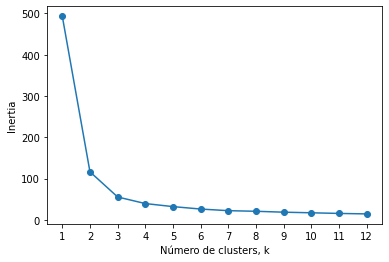

In [ ]:


plt.plot(list(inertias.keys()), 
         list(inertias.values()), '-o')
plt.xlabel('Número de clusters, k')
plt.ylabel('Inertia')
plt.xticks(list(inertias.keys()))
plt.show()

A medida que aumentamos k, la inercia cae muy rápid. Esta curva tiene aproximadamente la forma de un brazo, y hay un "codo" en k = 3.

__SI NO TUVIERAMOS MAS CONOCIMIENTO DE LOS DATOS k = 3 SERíA UNA BUENA OPCIÓN__

* Cualquier valor antes del codo sería dramático
* Cualquier valor despues del codo no ayudaría mucho, ya que podríamos simplemente estar dividiendo grupos perfectamente buenos por la mitad sin una buena razón.

Entonces, __si no hay información que ayude a tomar una mejor decisión, el valor del codo es la mejor opción__.

__NOTA__: En general este proceso no es sencillo y hay que tener en cuenta que K-Means es muy sensible a diferencias en las varianzas de las variables y a variables con escalas muy distintas.

#### Silhouette

* Un enfoque más preciso (pero también computacionalmente más costoso) es utilizar el __Silhouette score__. 

* El __Silhouette score__ es el silhouette medio sobre todas las instancias.

* El Silhouette de una instancia se define cómo $\frac{b-a}{max(a, b)}$ dónde:
    * $a$ es la distancia media a otras instancias en el mismo cluster (la distancia intra cluster media)
    * $b$ es la media de la distancia al cluster mas cercano (la distancia media a las instancias del siguiente cluster, definida como la que minimiza a $b$, excluyendo la distancia del propio cluster)

* El coeficiente Silouette está entre -1 y 1 esto se interpreta:
    * Entre mas cerca está de 1, significa que la instancia está bien dentro de su cluster y lejos de otros clusters
    * Entre mas cerca está de 0, significa que está muy cerca de una frontera entre clusters
    * Entre mas cerca está de -1 significa que la instancia ha sido asignada a un cluster donde no corresponde

##### Silhouette scores

In [ ]:
from sklearn.metrics import silhouette_score

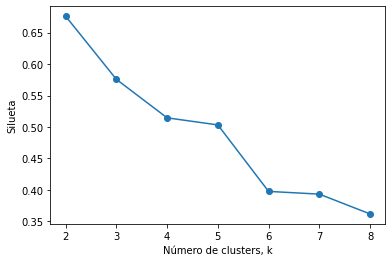

In [ ]:
silhouettes = {k: silhouette_score(X_train, KMeans(n_clusters=k).fit_predict(X_train)) for k in range(2, 9)}

plt.plot(list(silhouettes.keys()), 
         list(silhouettes.values()), '-o')
plt.xlabel('Número de clusters, k')
plt.ylabel('Silueta')
plt.xticks(list(silhouettes.keys()))
plt.show()

Está visualización es mas informativa que la gráfica del codo, en esta visualización observamos que `k=2` es un excelente `k`, pero `k=3` también es una excelente opción, estas opciones son mucho mejores que el resto, esta gráfica puede llegar a ser mas informativa que solo comparar inercias. 

##### Silhouette diagrama

Una visualización aun mas informativa se obtiene cuando gráficamos el silhouette de cada instancia, agrupada por los clusters que los contiene y ordenada por sus valores.

Cada diagrama tiene forma de cuchillo por cluster: 
* La altura del cuchillo significa la cantidad de instancias que contiene el cluster
* El ancho representa los coeficientes silhouette ordenados en el cluster (entre mas ancho mejor)
* La linea punteada representa el coeficiente silhouette medio

In [ ]:
%%bash
pip install yellowbrick

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

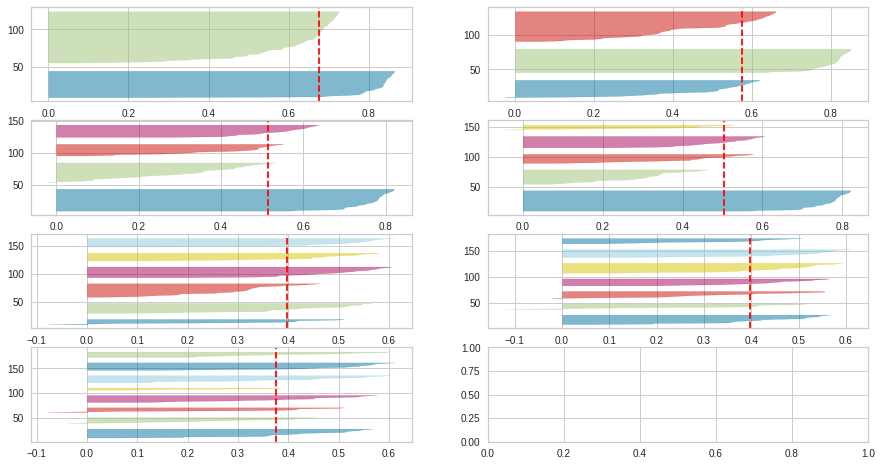

In [ ]:
fig, ax = plt.subplots(4, 2, figsize=(15,8))
for i in range(2, 9):
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X_train)

#### Recomendaciones para K-means

* Normalizar las variables antes de hacer K-means, restar a cada variable su media y dividirla por la desviación típica

## K-Medoids

k-Means y k-Medoids son algoritmos particionales (dividen el conjunto de datos en grupos). K-Means intenta minimizar el error cuadrático total, mientras que k-Medoids minimiza la suma de las diferencias entre los puntos etiquetados para estar en un grupo y un punto designado como el centro de ese grupo.

In [ ]:
%%bash
pip install scikit-learn-extra

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn_extra.cluster import KMedoids

In [ ]:
# importamos iris
iris_dat = datasets.load_iris()

iris = (pd.DataFrame(iris_dat.data)
       .rename(columns = {0:'sepal_length', 1:'sepal_width', 2:'petal_length', 3:'petal_width'})
       .assign(species = lambda x: pd.Series(iris_dat.target)#.replace({0:'virginica', 1:'setosa', 2:'versicolor'})
              )
       )

X = iris.drop(columns = ['species']).values
y = iris['species'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.30, 
                                                    random_state=42, 
                                                    stratify=y)

In [ ]:
kmedoids = KMedoids(n_clusters=3, random_state=0).fit(X_train)

In [ ]:
kmedoids.inertia_

70.59121341062232

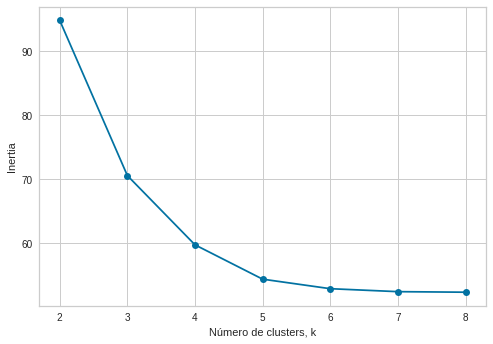

In [ ]:
inertias = {k: KMedoids(n_clusters=k).fit(X_train).inertia_ for k in range(2, 9)}

plt.plot(list(inertias.keys()), 
         list(inertias.values()), '-o')
plt.xlabel('Número de clusters, k')
plt.ylabel('Inertia')
plt.xticks(list(inertias.keys()))
plt.show()

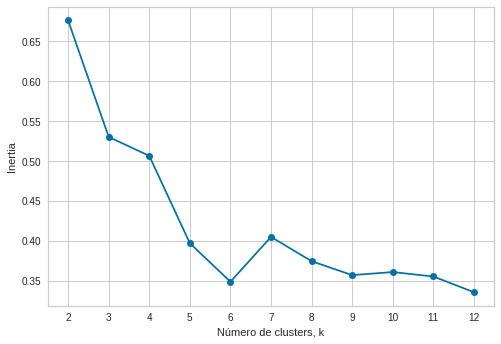

In [ ]:
silhouettes = {k: silhouette_score(X_train, KMedoids(n_clusters=k).fit_predict(X_train)) for k in range(2, 13)}

plt.plot(list(silhouettes.keys()), 
         list(silhouettes.values()), '-o')
plt.xlabel('Número de clusters, k')
plt.ylabel('Inertia')
plt.xticks(list(silhouettes.keys()))
plt.show()

## K-prototypes

In [ ]:
# https://www.linkedin.com/pulse/k-prototype-algorithm-powerful-clustering-technique-srihari-gopi
# The elements of statistical learning hastie, tibshirani, friedman

In [ ]:
%%bash
pip install kmodes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Import module for k-protoype cluster
from kmodes.kprototypes import KPrototypes

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/audhiaprilliant/audhiaprilliant.github.io/master/assets/docs/10000%20Sales%20Records.csv')

In [ ]:
df.shape

(10000, 14)

In [ ]:
df.head(3)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Sub-Saharan Africa,Chad,Office Supplies,Online,L,1/27/2011,292494523,2/12/2011,4484,651.21,524.96,2920025.64,2353920.64,566105.00
1,Europe,Latvia,Beverages,Online,C,12/28/2015,361825549,1/23/2016,1075,47.45,31.79,51008.75,34174.25,16834.50
2,Middle East and North Africa,Pakistan,Vegetables,Offline,C,1/13/2011,141515767,2/1/2011,6515,154.06,90.93,1003700.90,592408.95,411291.95


In [ ]:
df.dtypes

Region             object
Country            object
Item Type          object
Sales Channel      object
Order Priority     object
Order Date         object
Order ID            int64
Ship Date          object
Units Sold          int64
Unit Price        float64
Unit Cost         float64
Total Revenue     float64
Total Cost        float64
Total Profit      float64
dtype: object

In [ ]:
df.select_dtypes('object').nunique()

Region               7
Country            185
Item Type           12
Sales Channel        2
Order Priority       4
Order Date        2691
Ship Date         2719
dtype: int64

In [ ]:
df.describe()

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,1.000000e+04,10000.000000,10000.000000,10000.000000,1.000000e+04,1.000000e+04,1.000000e+04
mean,5.498719e+08,5002.855900,268.143139,188.806639,1.333355e+06,9.382658e+05,3.950893e+05
std,2.607835e+08,2873.246454,217.944092,176.445907,1.465026e+06,1.145914e+06,3.775550e+05
min,1.000892e+08,2.000000,9.330000,6.920000,1.679400e+02,1.245600e+02,4.338000e+01
25%,3.218067e+08,2530.750000,109.280000,56.670000,2.885511e+05,1.647855e+05,9.832914e+04
50%,5.485663e+08,4962.000000,205.700000,117.110000,8.000512e+05,4.816058e+05,2.890990e+05
75%,7.759981e+08,7472.000000,437.200000,364.690000,1.819143e+06,1.183822e+06,5.664227e+05
max,9.999342e+08,10000.000000,668.270000,524.960000,6.680027e+06,5.241726e+06,1.738178e+06


In [ ]:
df.drop(['Country', 'Order Date', 'Order ID', 'Ship Date'], axis = 1, inplace = True)

In [ ]:
df.shape

(10000, 10)

In [ ]:
df.head(3)

,Region,Item Type,Sales Channel,Order Priority,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Sub-Saharan Africa,Office Supplies,Online,L,4484,651.21,524.96,2920025.64,2353920.64,566105.00
1,Europe,Beverages,Online,C,1075,47.45,31.79,51008.75,34174.25,16834.50
2,Middle East and North Africa,Vegetables,Offline,C,6515,154.06,90.93,1003700.90,592408.95,411291.95


K-Prototype del módulo kmodes necesita variables categóricas o la posición de las columnas en los datos. se deben guardar en una variable llamada catColumnsPos.

In [ ]:
catColumnsPos = [df.columns.get_loc(col) for col in list(df.select_dtypes('object').columns)]
print('Categorical columns           : {}'.format(list(df.select_dtypes('object').columns)))
print('Categorical columns position  : {}'.format(catColumnsPos))

Categorical columns           : ['Region', 'Item Type', 'Sales Channel', 'Order Priority']
Categorical columns position  : [0, 1, 2, 3]


In [ ]:
# Convert dataframe to matrix
dfMatrix = df.to_numpy()

In [ ]:
# seleccionamos el k optimo
cost = []
for cluster in range(1, 5):
    try:
        kprototype = KPrototypes(n_jobs = -1, n_clusters = cluster, init = 'Huang', random_state = 0)
        kprototype.fit_predict(dfMatrix, categorical = catColumnsPos)
        cost.append(kprototype.cost_)
        print('Cluster initiation: {}'.format(cluster))
    except:
        break

Cluster initiation: 1
Cluster initiation: 2
Cluster initiation: 3
Cluster initiation: 4


In [ ]:
cost

[3.6016173492135216e+16,
 9627986092172950.0,
 4960707512782198.0,
 2927457054391281.5]

In [ ]:
# convertimos los resultados a un dataframe para que puedan ser graficados despues
df_cost = pd.DataFrame({'Cluster':range(1, 5), 'Cost':cost})

In [ ]:
df_cost

,Cluster,Cost
0,1,3.601617e+16
1,2,9.627986e+15
2,3,4.960708e+15
3,4,2.927457e+15


In [ ]:
# K Vecinos -> Supervisado

Mezcla Gusiana

Flor 1 es 98% del Gpo 1, 1% Gpo 2 y 1% Gpo 3


In [ ]:
# Gaussian_Mitxture_Model

DBSCAN
distancia < 0.1
La meojr distancia se puede obtener a través de 
K vecinos k = 2 (distancia media entre vecinos)

## Ejercicios

Considera los datos del siguiente [enlace](https://docs.google.com/spreadsheets/d/1K7Xib-hsgPwn9sOPdCM6FzOibzd5co9ij0FwnF6OOVs/edit?usp=sharing):


1.   Realiza el trabajo de limpieza y preprocesamiento de datos 
2.   ¿Si yo quisiera separar a los estudiantes, cómo serían esos grupos? (realizar perfilamiento)
3.   ¿Quienes son los representantes de cada grupo?



## Extra/Tarea
Considera los datos [`creditcard.csv`](https://drive.google.com/file/d/1l2nx5mv6Fl0CR9jXyLO0fX1ehYUfKw7j/view?usp=sharing)

1.   Filtra y quedate con observaciones de clase cero
2.   Ajusta clusters a tus datos


In [ ]:
# Respuesta